Cantidad de valores nulos por columna:
belongs_to_collection    40891
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   3
production_companies         3
production_countries         3
release_date                 3
revenue                      0
runtime                    249
spoken_languages             3
status                      83
tagline                  24981
title                        3
vote_average                 3
vote_count                   3
release_year                 3
return                       0
dtype: int64


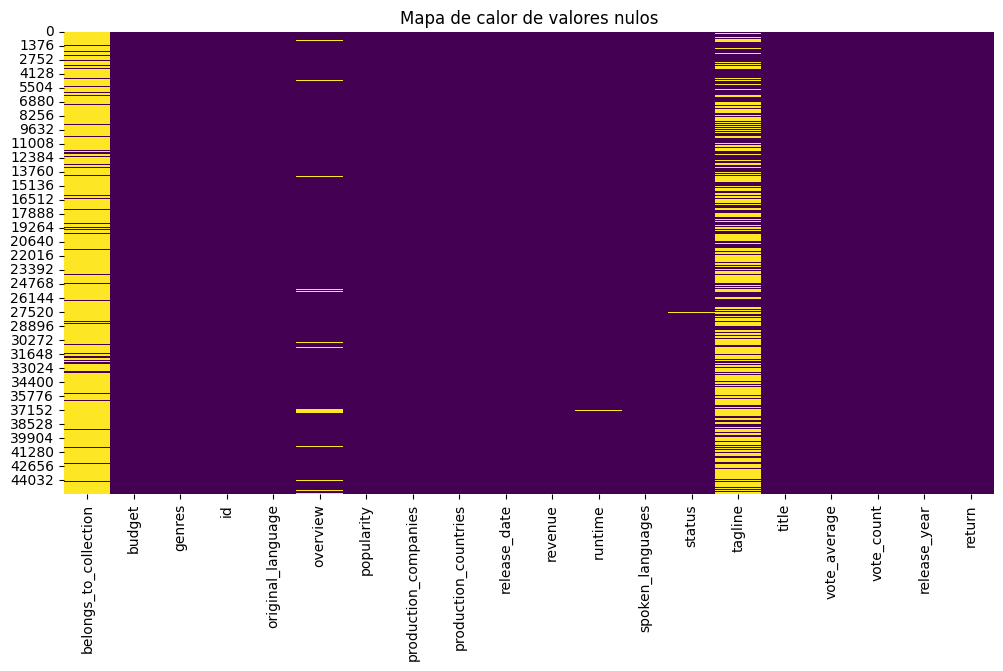

Cantidad de filas duplicadas: 17


,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
1463,None,0.0,"Drama, Romance",105045,de,"East-Berlin, 1961, shortly after the erection ...",0.122178,"Studio Babelsberg, Centre National de la Ciném...",Germany,1995-02-16,0.0,115.0,Deutsch,Released,"A love, a hope, a wall.",The Promise,5.0,1.0,1995.0,0.0
9160,None,0.0,"Crime, Drama, Thriller",5511,fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,"Fida cinematografica, Compagnie Industrielle e...","France, Italy",1967-10-25,39481.0,105.0,Français,Released,There is no solitude greater than that of the ...,Le Samouraï,7.9,187.0,1967.0,0.0
9322,None,0.0,"Adventure, Animation, Drama, Action, Foreign",23305,en,"In feudal India, a warrior (Khan) who renounce...",1.967992,Filmfour,"France, Germany, India, United Kingdom",2001-09-23,0.0,86.0,हिन्दी,Released,None,The Warrior,6.3,15.0,2001.0,0.0
13370,None,0.0,"Thriller, Mystery",141971,fi,Recovering from a nail gun shot to the head an...,0.411949,Filmiteollisuus Fine,Finland,2008-12-26,0.0,108.0,suomi,Released,Which one is the first to return - memory or t...,Blackout,6.7,3.0,2008.0,0.0
16757,None,0.0,"Thriller, Mystery",141971,fi,Recovering from a nail gun shot to the head an...,0.411949,Filmiteollisuus Fine,Finland,2008-12-26,0.0,108.0,suomi,Released,Which one is the first to return - memory or t...,Blackout,6.7,3.0,2008.0,0.0


Porcentaje de valores faltantes por columna: 
belongs_to_collection    90.109963
tagline                  55.049693
overview                  2.073646
runtime                   0.548712
status                    0.182904
original_language         0.024240
popularity                0.006611
release_date              0.006611
production_countries      0.006611
production_companies      0.006611
spoken_languages          0.006611
title                     0.006611
vote_average              0.006611
vote_count                0.006611
release_year              0.006611
dtype: float64


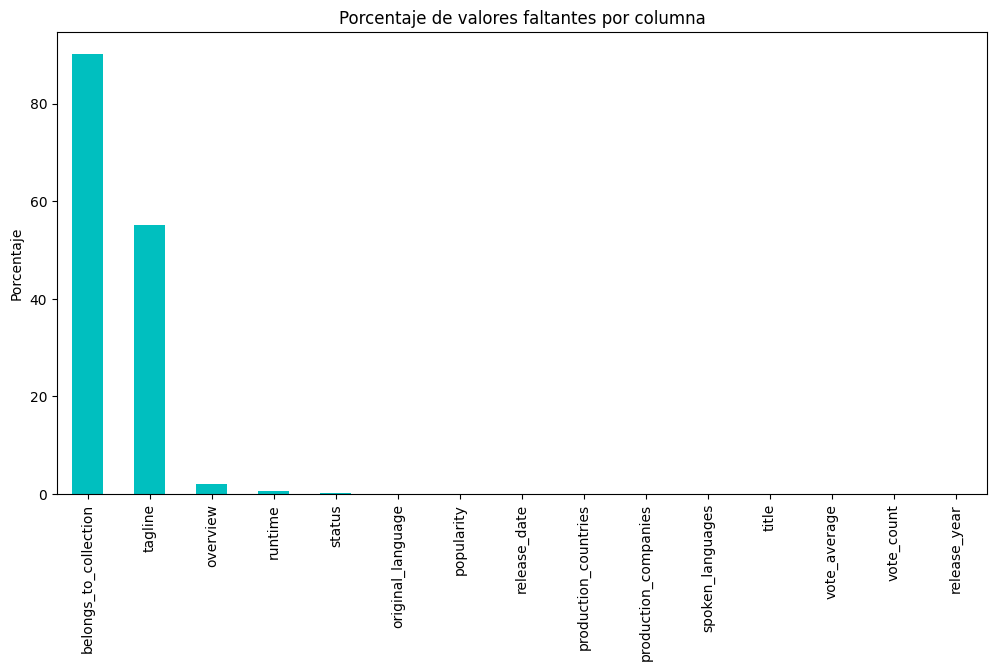

Tipos de datos de cada columna:
belongs_to_collection            object
budget                          float64
genres                           object
id                               object
original_language                object
overview                         object
popularity                      float64
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
vote_average                    float64
vote_count                      float64
release_year                    float64
return                          float64
dtype: object
Estadísticas Descriptivas Generales:
             budget    popularity                   release_date  \
count  4.537900e+04  45376.000000                

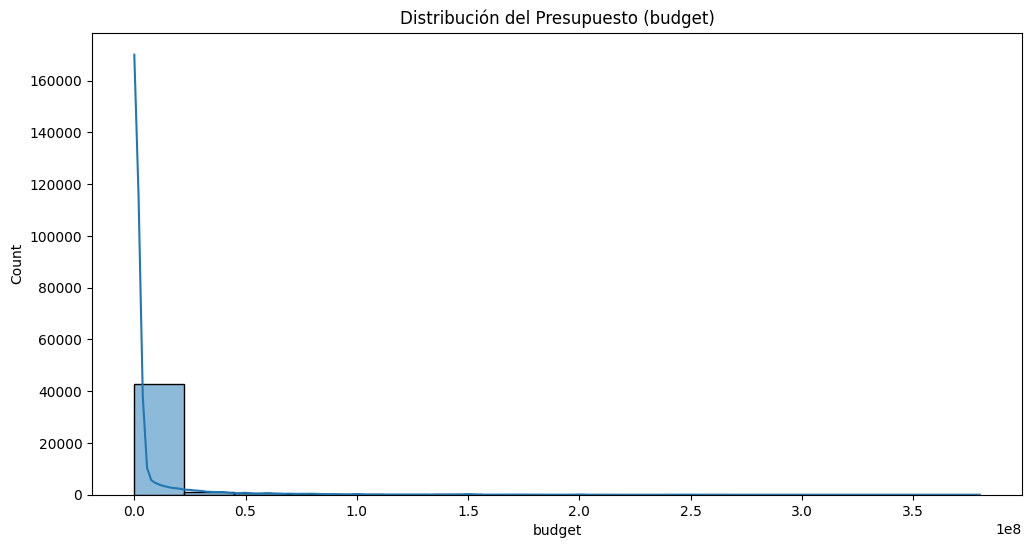

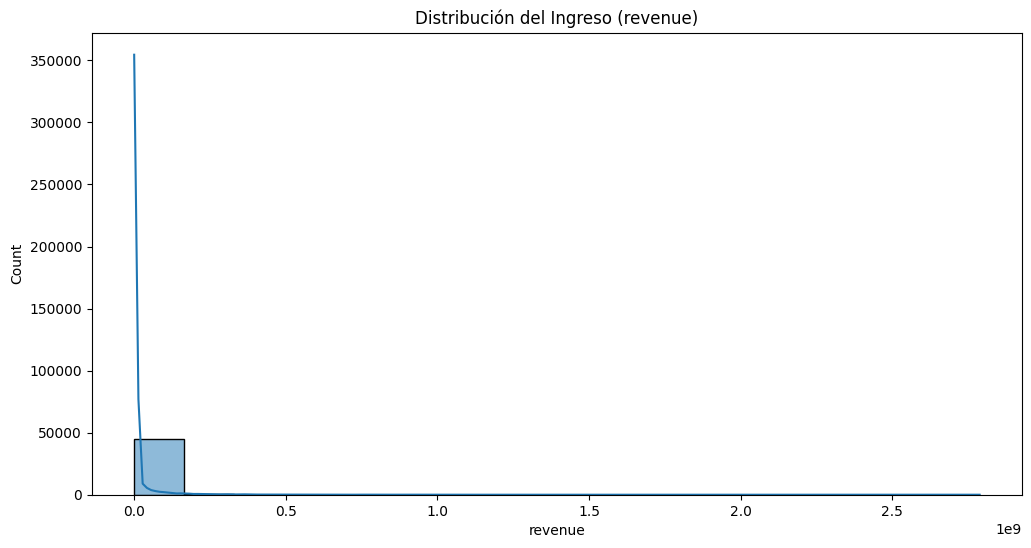

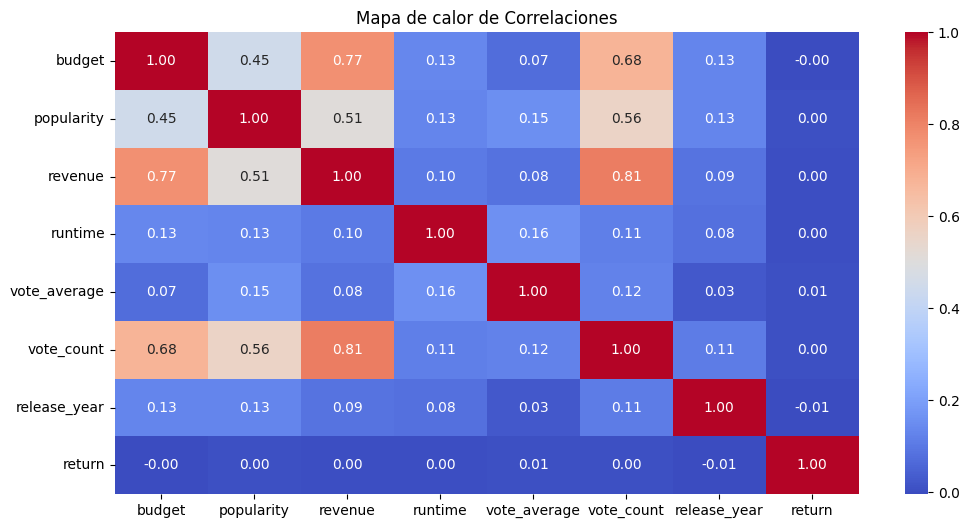

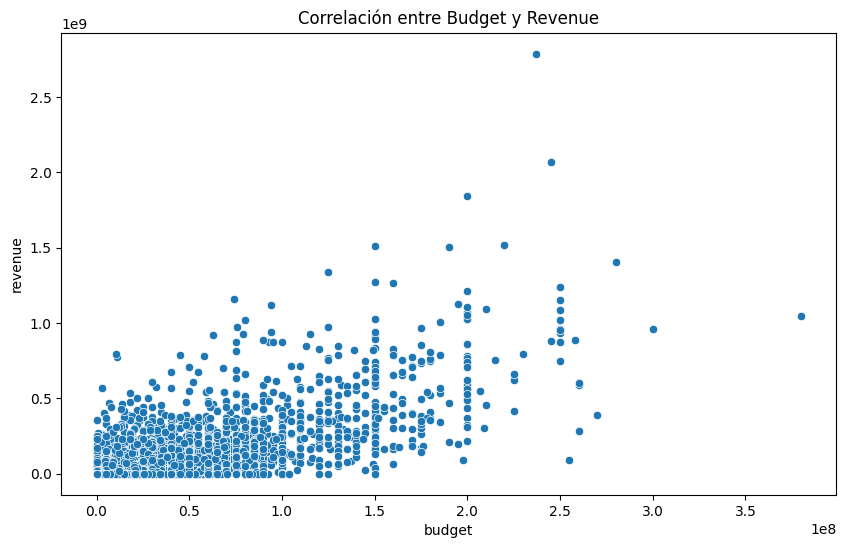

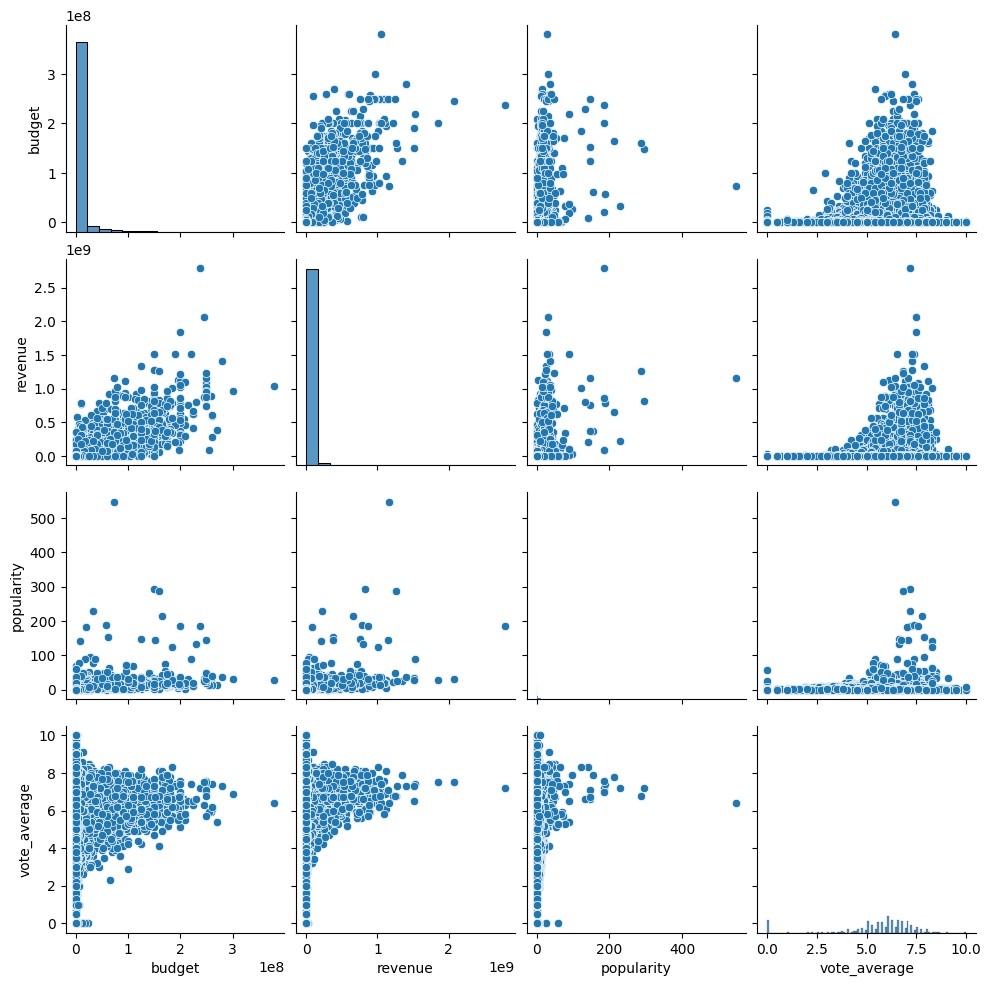

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_parquet('../data/movies_dataset.parquet')

# 1. Chequeo de Nulos
print("Cantidad de valores nulos por columna:")
print(df.isnull().sum())

# Visualización de valores nulos
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores nulos")
plt.show()

# 2. Valores Duplicados
print(f"Cantidad de filas duplicadas: {df.duplicated().sum()}")
df_duplicados = df[df.duplicated()]
display(df_duplicados.head())  # Muestra algunas filas duplicadas

# 3. Valores Faltantes
# Visualización de porcentaje de valores faltantes por columna
faltantes = df.isnull().mean() * 100
faltantes = faltantes[faltantes > 0].sort_values(ascending=False)
print(f"Porcentaje de valores faltantes por columna: \n{faltantes}")

plt.figure(figsize=(12,6))
faltantes.plot(kind='bar', color='c')
plt.title('Porcentaje de valores faltantes por columna')
plt.ylabel('Porcentaje')
plt.show()

# 4. Tipos de Datos
print("Tipos de datos de cada columna:")
print(df.dtypes)

# Convertir columnas a tipos de datos correctos si es necesario
# Por ejemplo, convertir 'release_date' a datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# 5. Análisis Estadístico de Datos
print("Estadísticas Descriptivas Generales:")
print(df.describe())

# Distribuciones de variables clave
plt.figure(figsize=(12,6))
sns.histplot(df['budget'], kde=True)
plt.title('Distribución del Presupuesto (budget)')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['revenue'], kde=True)
plt.title('Distribución del Ingreso (revenue)')
plt.show()

# 6. Análisis de Correlaciones
# Filtrar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Correlación bivariada entre variables numéricas
plt.figure(figsize=(12,6))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de Correlaciones')
plt.show()

# Relación entre 'budget' y 'revenue' (Correlación bivariada)
plt.figure(figsize=(10,6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Correlación entre Budget y Revenue')
plt.show()

# 7. Análisis de Correlaciones Multivariado (Pairplot)
sns.pairplot(df[['budget', 'revenue', 'popularity', 'vote_average']])
plt.show()

